# Extraindo Melspectrogramas para CNNs

In [8]:
import librosa
import os
import matplotlib.pyplot as plt

In [2]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [3, 3],
    'axes.labelsize': 18,
    'axes.titlesize':20,
    'font.size': 18,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.axisbelow': True
}
plt.rcParams.update(params)

## Com janelamento

In [3]:
def fazerJanelamento(sinal, frameLength, overlapLength):
    # Função que faz o janelamento
    # Existe um problema em deixar que as funções de extração de features criadas acima façam o janelamento: 
    # ao invés de retornarem valores unitários para as features, elas vão retornar um array em que cada posição 
    # representa um janelamento. Portanto, a solução é fazer o janelamento antes de extrair as features e deixar 
    # para mandar para essas funções apenas as janelas, fazendo com que frameLength seja igual ao tamanho da 
    # janela que está sendo enviada e que overlapLength seja 0.
    # A função abaixo usa a função frame do librosa que retorna as janelas como COLUNAS. 
    # Como eu quero que cada janela seja uma LINHA, eu retorno a transposta dessa função.
    return librosa.util.frame(sinal, frame_length=frameLength, hop_length=overlapLength).T

In [4]:
sinalOriginal, freqAmostragem = librosa.load("/home/dimi/Downloads/datasets/ESC_10_16kHz_8bits/original/rooster_183487A_4.wav", sr=None, mono=True)
frameLength    = int(0.200 * freqAmostragem) # 200 milisegundos
overlapLength  = int(frameLength / 2) # 50% de overlap

print(freqAmostragem)
print(frameLength)
print(overlapLength)

16000
3200
1600


In [5]:
janelas = fazerJanelamento(sinalOriginal, frameLength, overlapLength)
print(janelas.shape)

(15, 3200)


(100, 100)


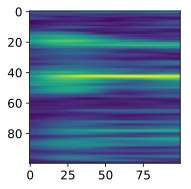

(100, 100)


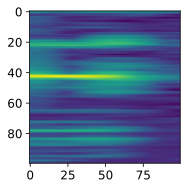

(100, 100)


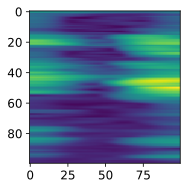

(100, 100)


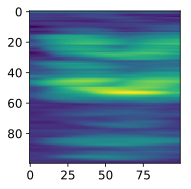

(100, 100)


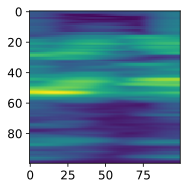

(100, 100)


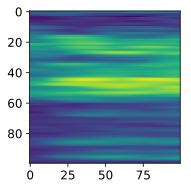

(100, 100)


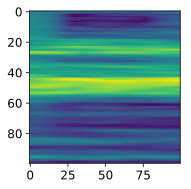

(100, 100)


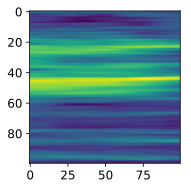

(100, 100)


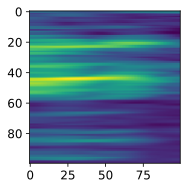

(100, 100)


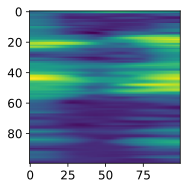

(100, 100)


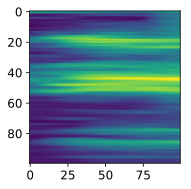

(100, 100)


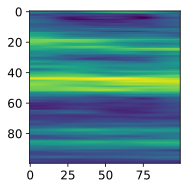

(100, 100)


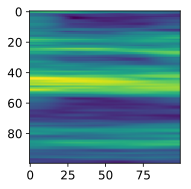

(100, 100)


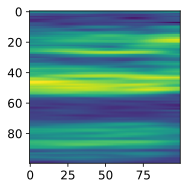

(100, 100)


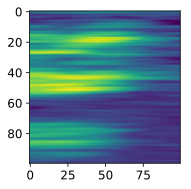

In [7]:
horizontal = 100
vertical   = 100

for janelaAtual in janelas:
    mel_spec = librosa.feature.melspectrogram(y=janelaAtual, sr=freqAmostragem, hop_length=int(len(janelaAtual)/horizontal), n_mels=vertical)[:,:-1]
    mel_db   = librosa.power_to_db(mel_spec)
    print(mel_db.shape)

    plt.imshow(mel_db, interpolation='nearest', aspect='auto')
    plt.tight_layout()
    plt.show()

## Sem janelamento

dog_30226A_1.wav
(75392,)
(50, 50)


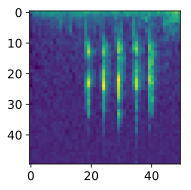

dog_155312A_3.wav
(46080,)
(50, 50)


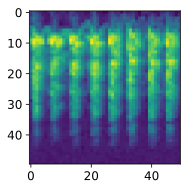

helicopter_161579B_4.wav
(80000,)
(50, 50)


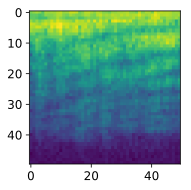

clocktick_57163A_1.wav
(80000,)
(50, 50)


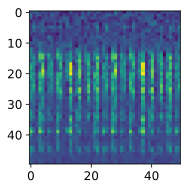

sneezing_82538A_2.wav
(11776,)
(50, 50)


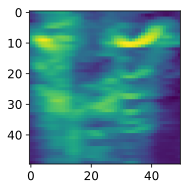

helicopter_68630C_3.wav
(80000,)
(50, 50)


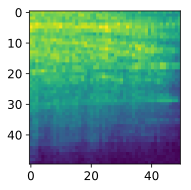

seawaves_61252A_1.wav
(80000,)
(50, 50)


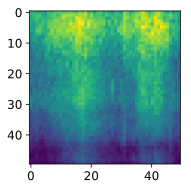

clocktick_42139A_1.wav
(80000,)
(50, 50)


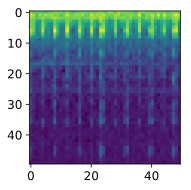

seawaves_167063A_4.wav
(80000,)
(50, 50)


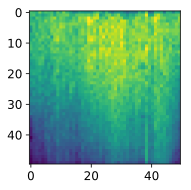

chainsaw_165856A_3.wav
(66176,)
(50, 50)


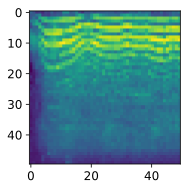

rain_198321A_5.wav
(80000,)
(50, 50)


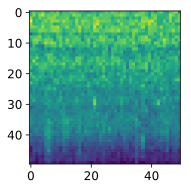

cryingbaby_167077B_4.wav
(61952,)
(50, 50)


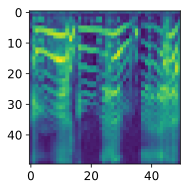

clocktick_127108A_2.wav
(80000,)
(50, 50)


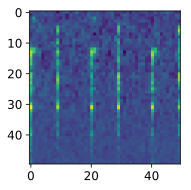

clocktick_119748A_2.wav
(80000,)
(50, 50)


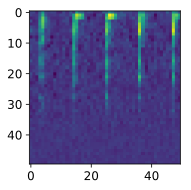

chainsaw_216370B_5.wav
(80000,)
(50, 50)


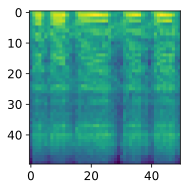

clocktick_62849A_1.wav
(80000,)
(50, 50)


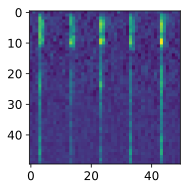

dog_183992A_4.wav
(23552,)
(50, 50)


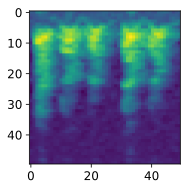

clocktick_164688A_3.wav
(80000,)
(50, 50)


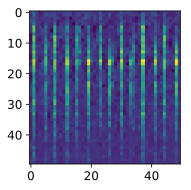

cracklingfire_17808A_1.wav
(80000,)
(50, 50)


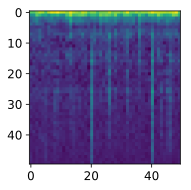

seawaves_187710A_3.wav
(38912,)
(50, 50)


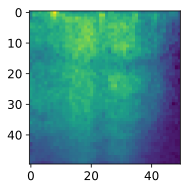

clocktick_170383A_3.wav
(80000,)
(50, 50)


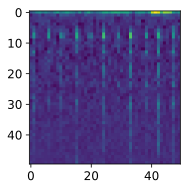

In [23]:
dirOrigem  = "/home/dimi/Downloads/datasets/ESC_10_16kHz_8bits/original/"
horizontal = 50
vertical   = 50

for i, arquivoAtual in enumerate(os.listdir(dirOrigem)):
    if arquivoAtual[-4:] == ".wav":
        sinalOriginal, freqAmostragem = librosa.load(dirOrigem+arquivoAtual, sr=None, mono=True)
        mel_spec = librosa.feature.melspectrogram(y=sinalOriginal, sr=freqAmostragem, hop_length=int(len(sinalOriginal)/horizontal), n_mels=vertical)[:,:-1]
        mel_db   = librosa.power_to_db(mel_spec)
        
        print(arquivoAtual)
        print(sinalOriginal.shape)
        print(mel_db.shape)

        plt.imshow(mel_db, interpolation='nearest', aspect='auto')
        plt.tight_layout()
        plt.show()
        
        if i == 20:
            break